In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.io as sio
import pandas as pd

Text(0.5, 1.0, 'Mouse Movement Over Time')

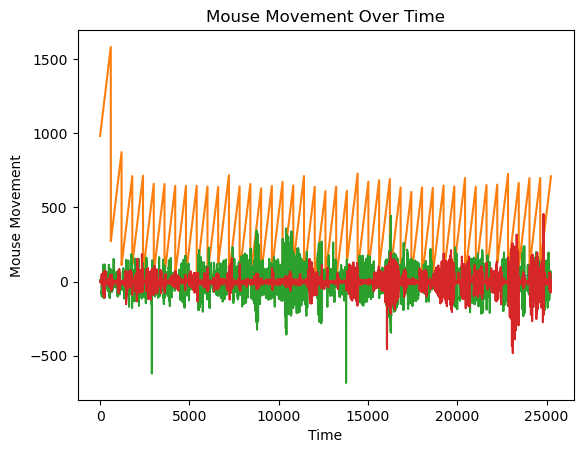

In [2]:
# load the data from the .mat file
data = sio.loadmat('/Users/tstakuma/Desktop/Rikkyo_Action_Analysis/PRJ/sample data 2/1_19-Oct-2019_10-18-23_mouse.mat')

mouseMovement = data['mouseMovement']
# extract the x and y coordinates
x = data['mouseMovement'][0]
y = data['mouseMovement'][1]

fig, ax = plt.subplots()
# Plot the mouseMovement values over time
ax.plot(range(len(mouseMovement)), mouseMovement)

# Set the labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Mouse Movement')
ax.set_title('Mouse Movement Over Time')

In [3]:
def traj_withColour(x, y, fig=None, ax=None):
    if fig is None:
        fig, ax = plt.subplots()
    colors = np.linspace(0, 1, len(x))
    ax.plot(x, y, '-k', alpha=0.2)
    ax.scatter(x, y, c=colors, cmap='turbo')
    ax.plot(x[0], y[0], 'Dr', label='start', markersize=8)
    ax.axis('equal')
    norm = mpl.colors.Normalize(vmin=0, vmax=len(x))
    cbar = fig.colorbar(mpl.cm.ScalarMappable(
        cmap='turbo', norm=norm), ax=ax)
    cbar.set_label('Time step')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    return fig, ax  # Corrected return statement

In [4]:
# convert mouseMovement from a 2D array to pandas dataframe
df = pd.DataFrame(mouseMovement, columns=['trial', 'sample', 'dx', 'dy'])

# add columns for x and y coordinates by cumulatively summing dx and dy. Group by trial
# df.groupby('trial')
df['x'] = df.groupby('trial')['dx'].cumsum()
df['y'] = df.groupby('trial')['dy'].cumsum()

# ungroup the dataframe
df = df.reset_index(drop=True)
df.head()

trial  sample  dx  dy   x  y
0      1     982   3  -1   3 -1
1      1     983   3  -1   6 -2
2      1     984   2  -1   8 -3
3      1     985   4  -1  12 -4
4      1     986   7  -3  19 -7

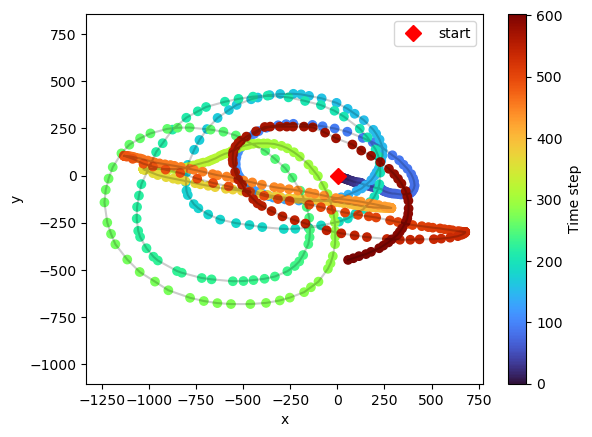

In [5]:
# plot the first trial
df_ = df[df['trial'] == 1]
x = df_[['x']].values
y = df_[['y']].values
fig, ax = traj_withColour(x, y)

/var/folders/0s/3n_h1cfj53s3hrvmsk3m0px80000gn/T/ipykernel_18913/2497745614.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


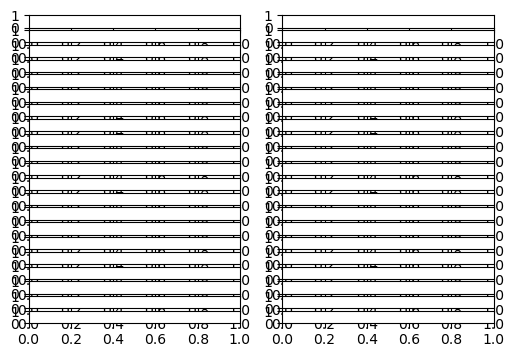

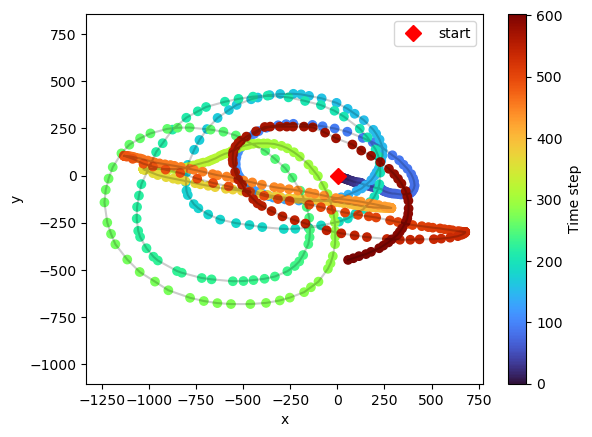

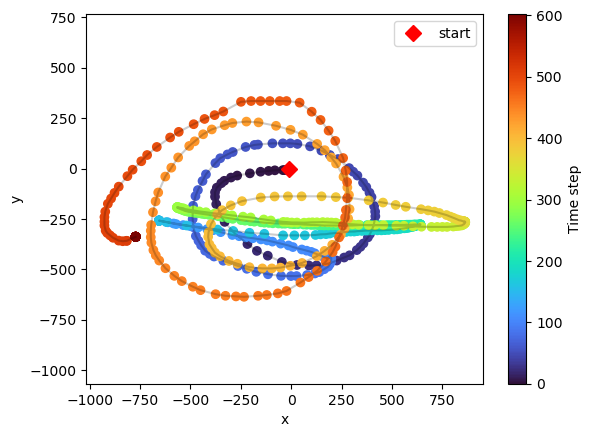

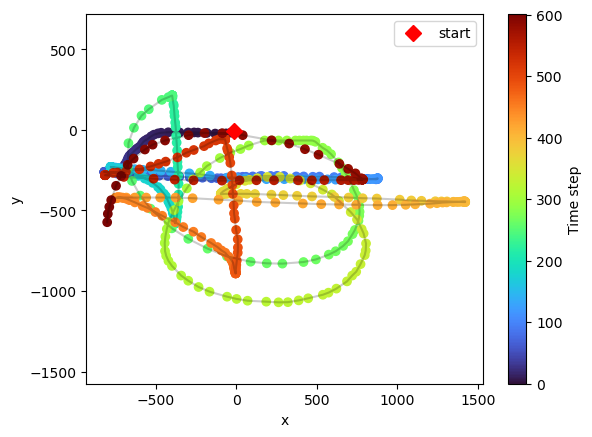

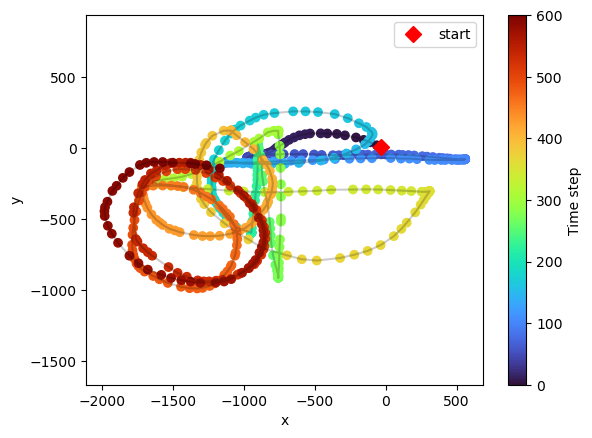

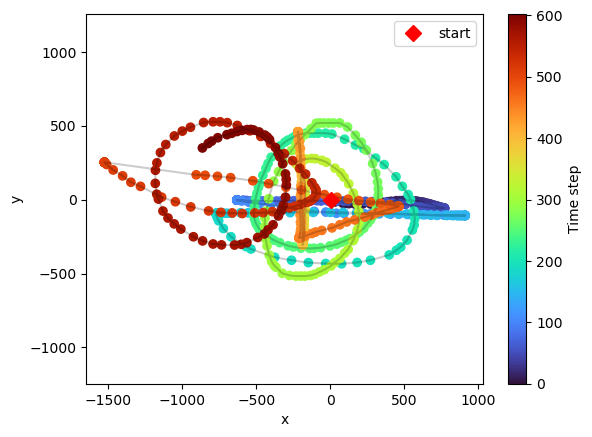

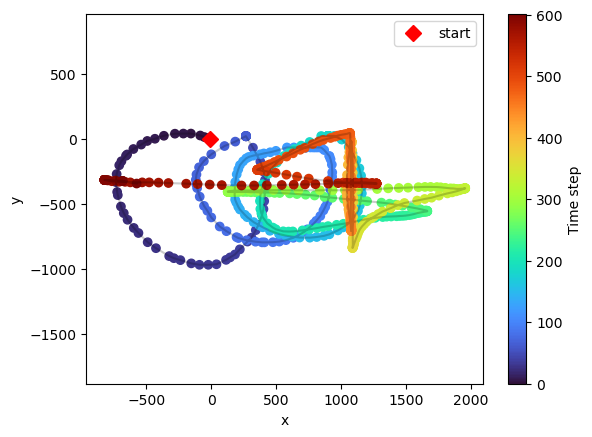

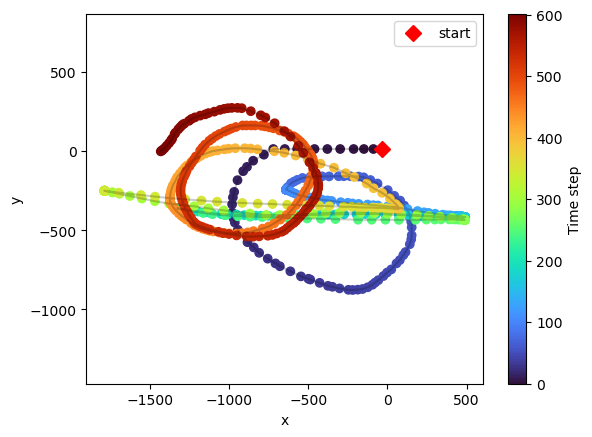

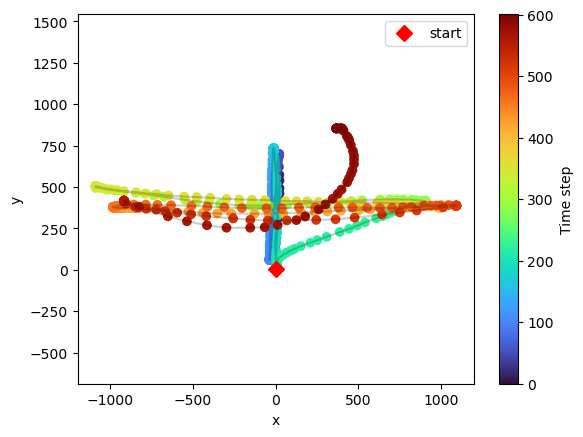

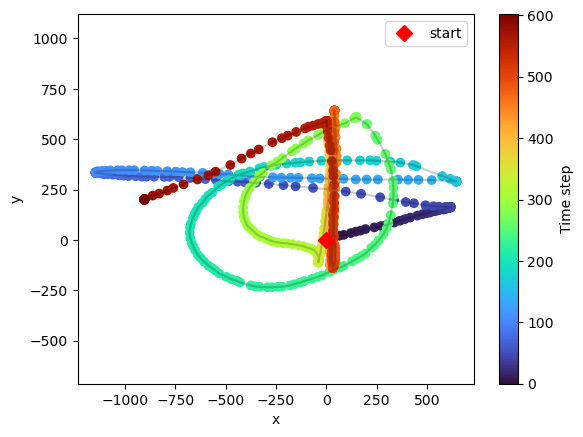

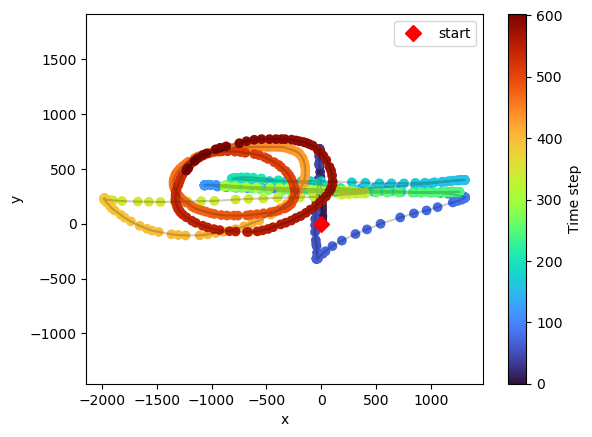

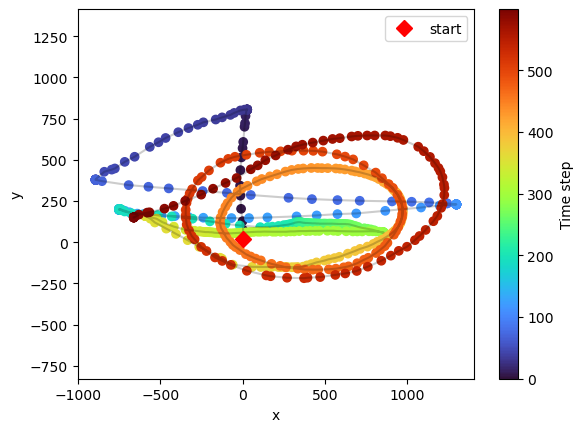

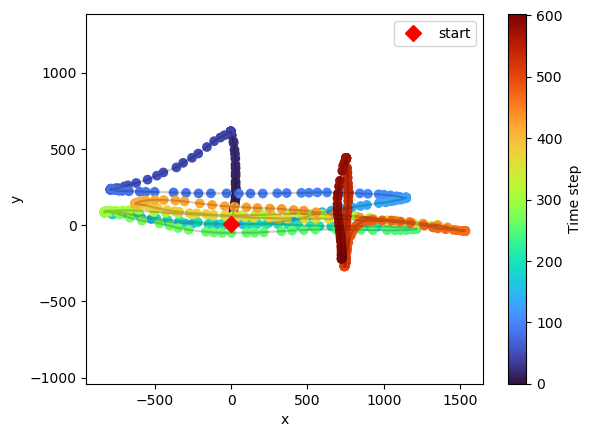

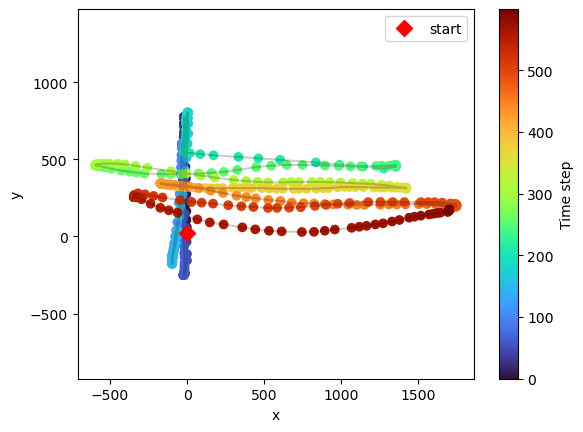

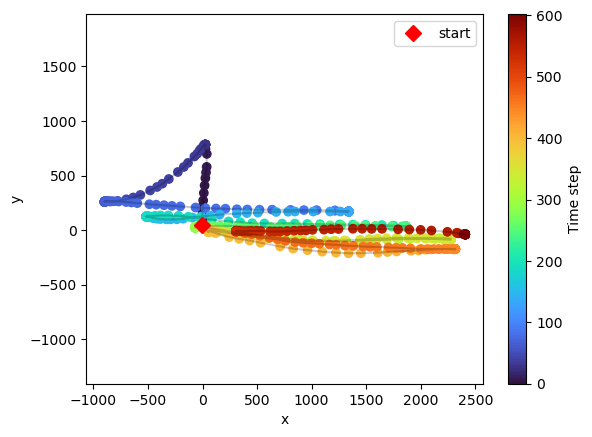

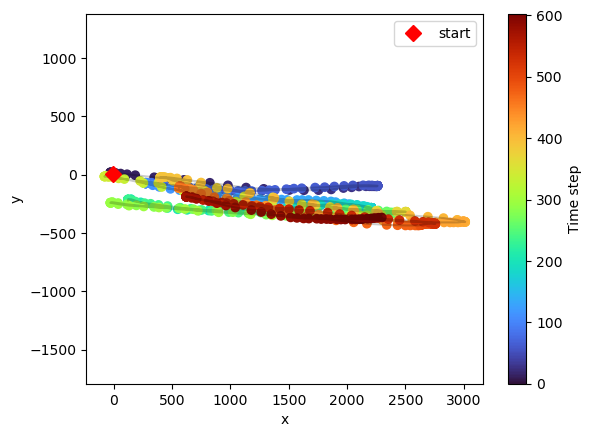

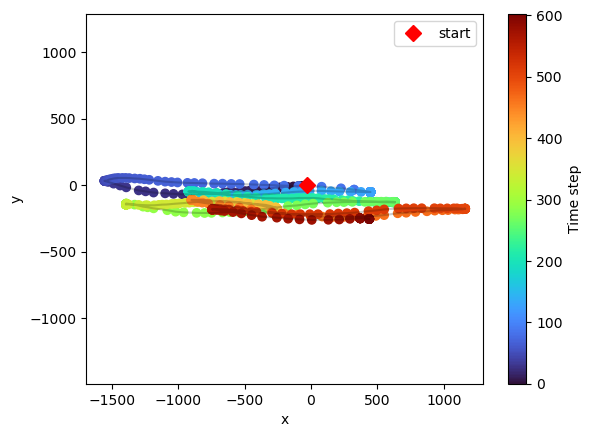

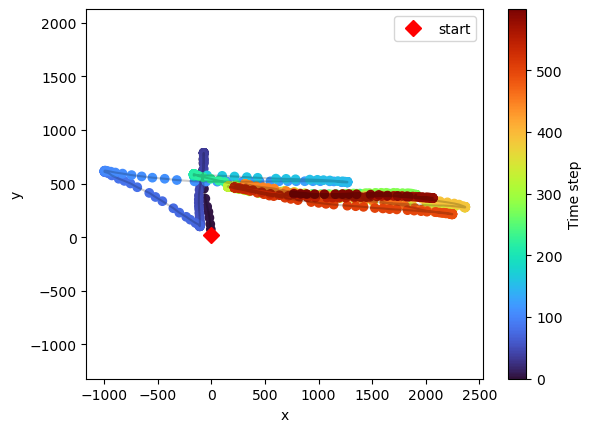

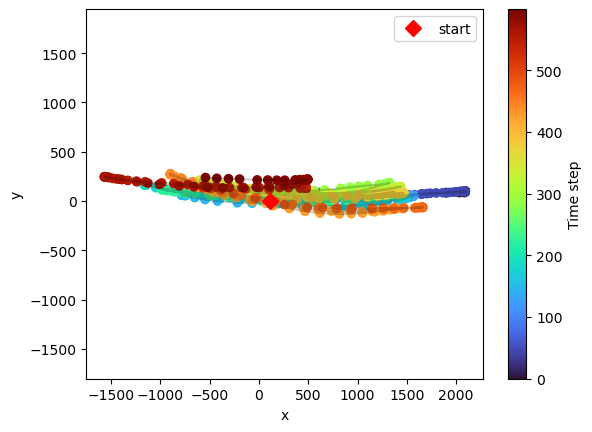

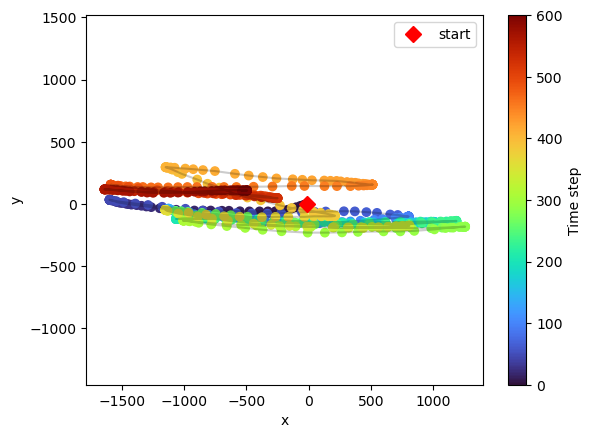

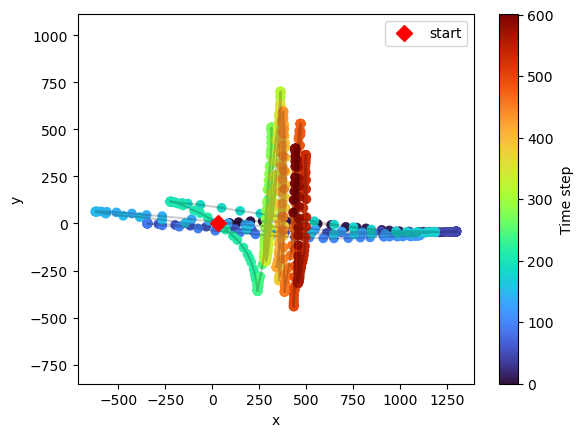

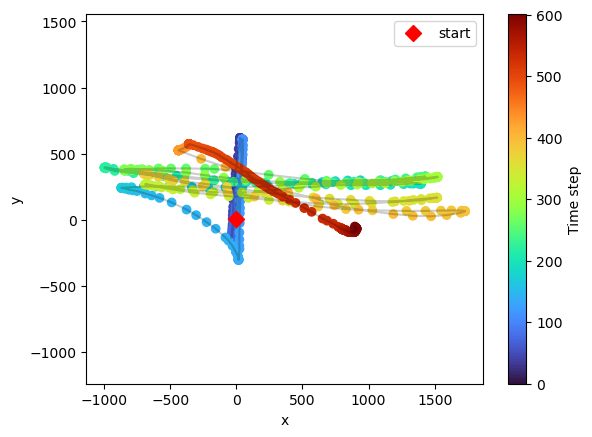

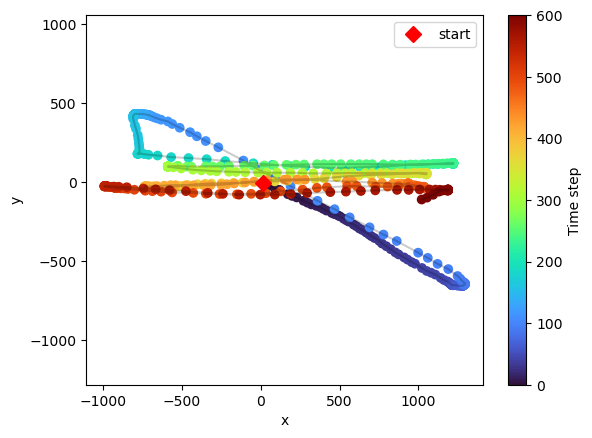

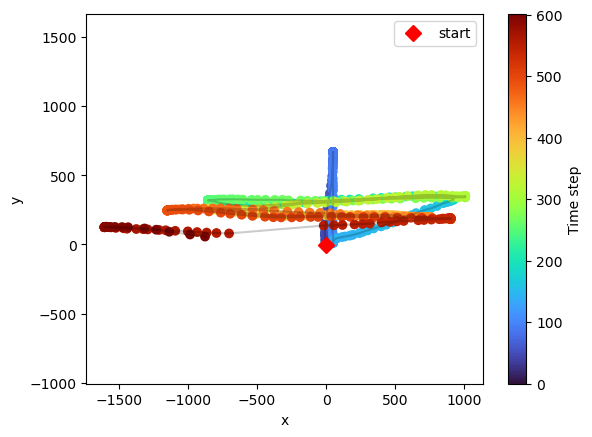

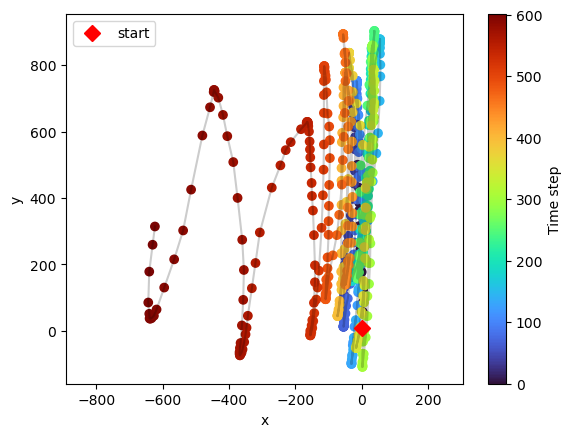

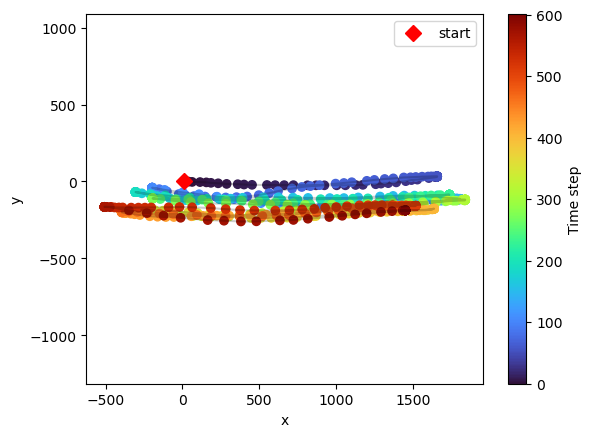

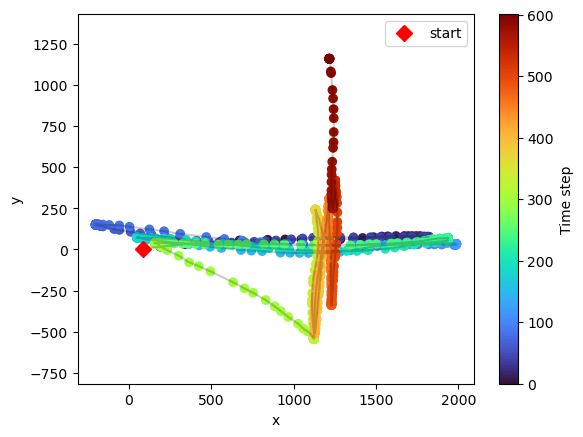

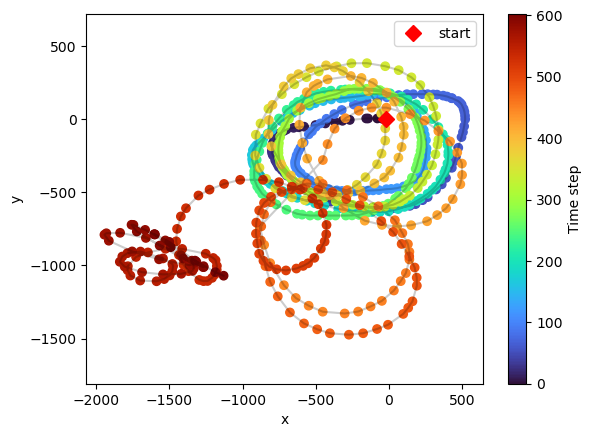

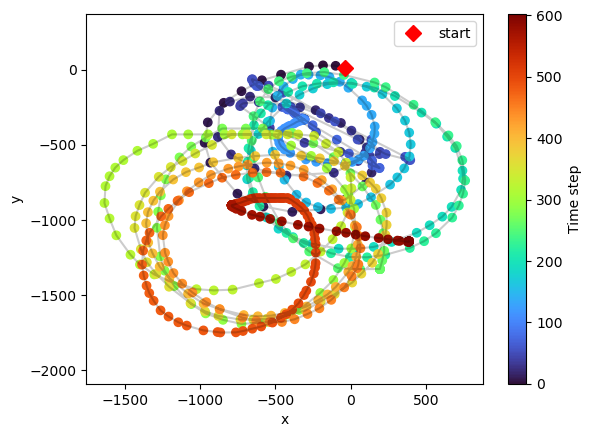

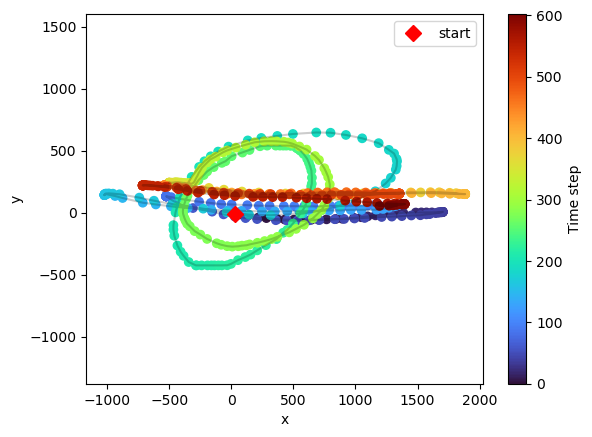

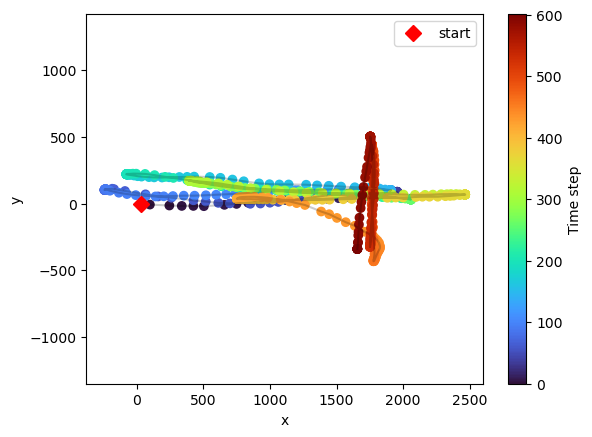

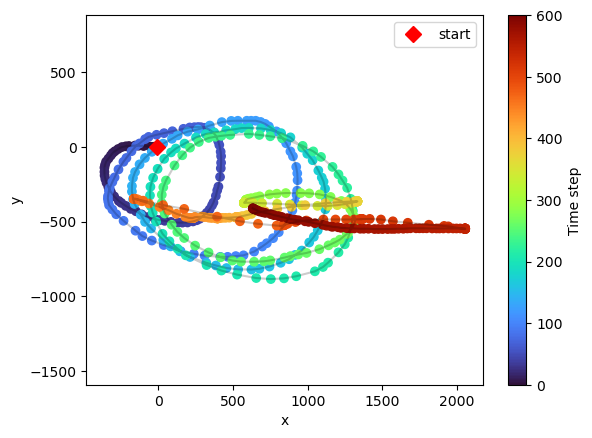

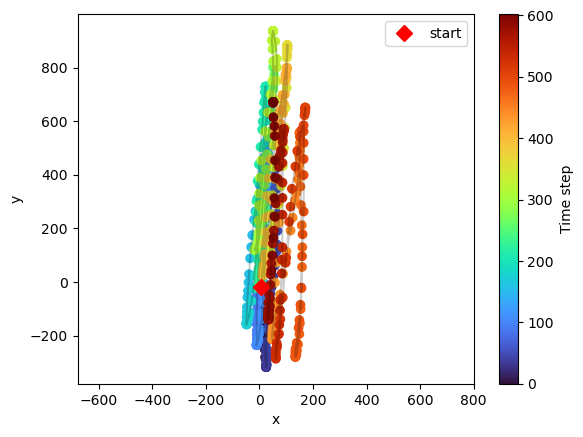

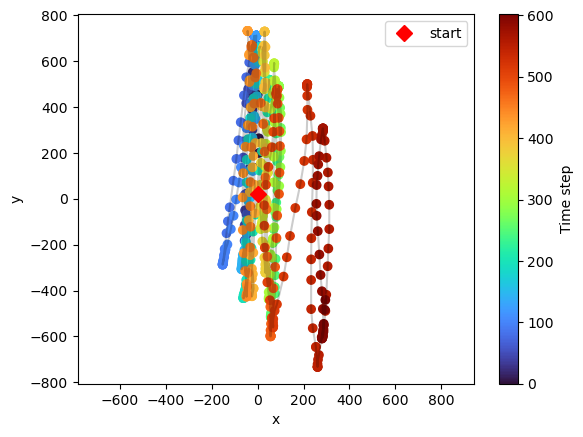

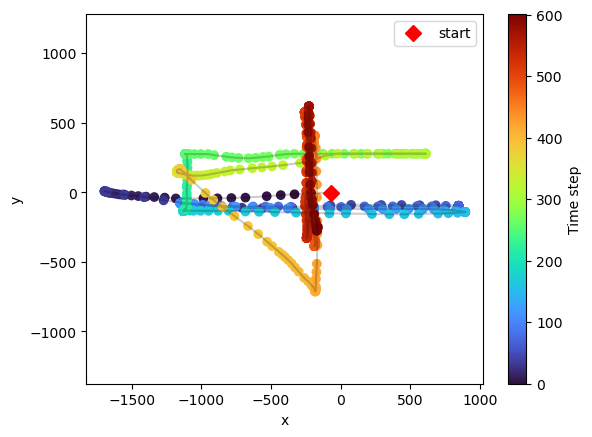

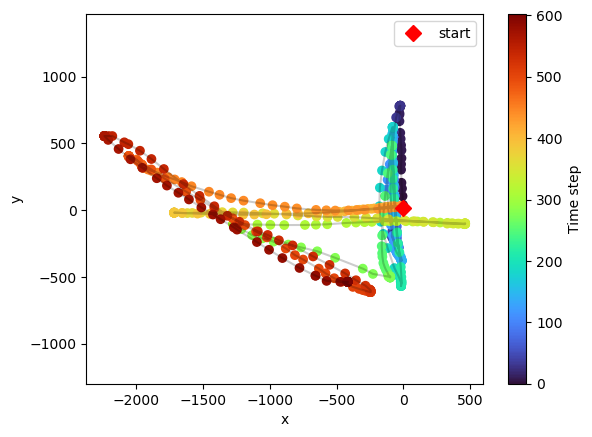

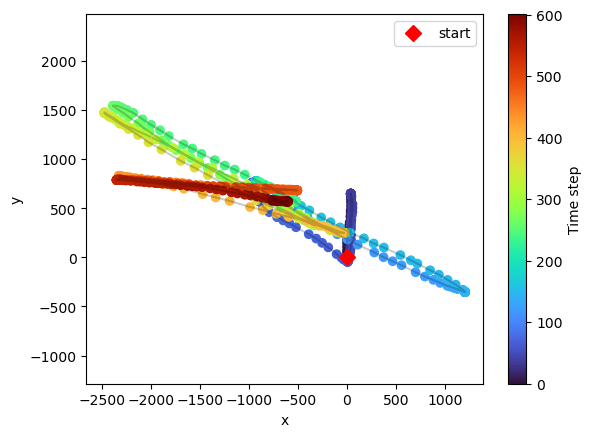

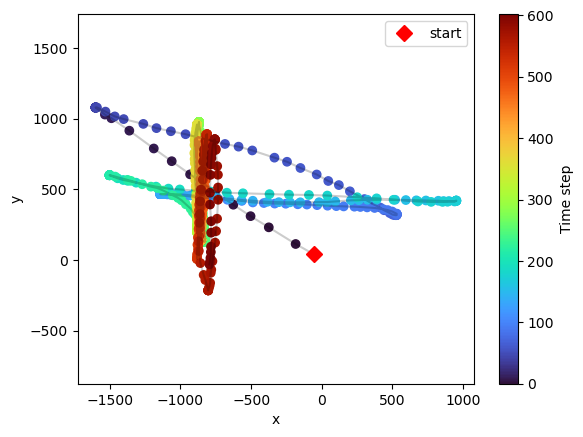

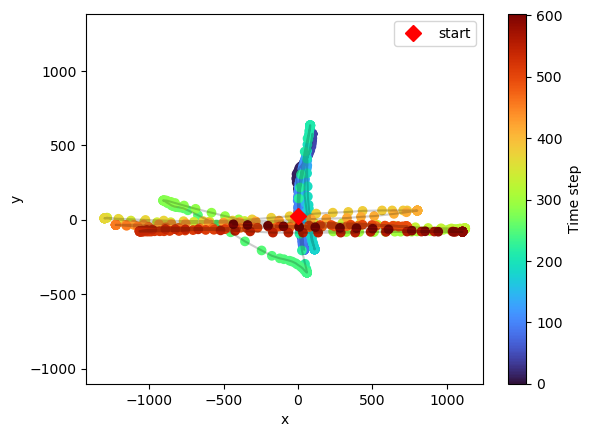

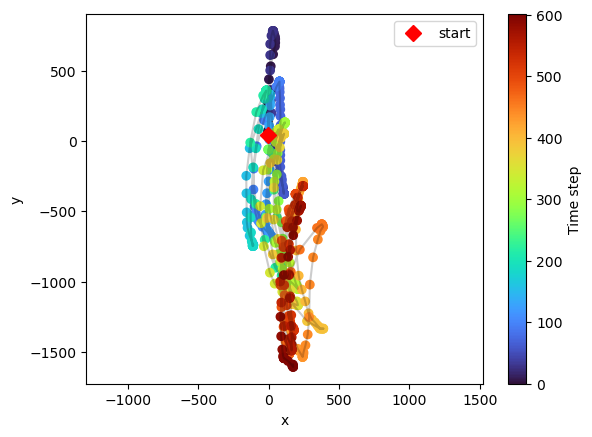

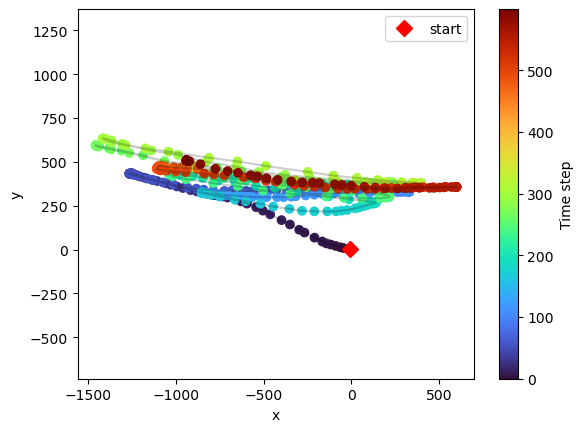

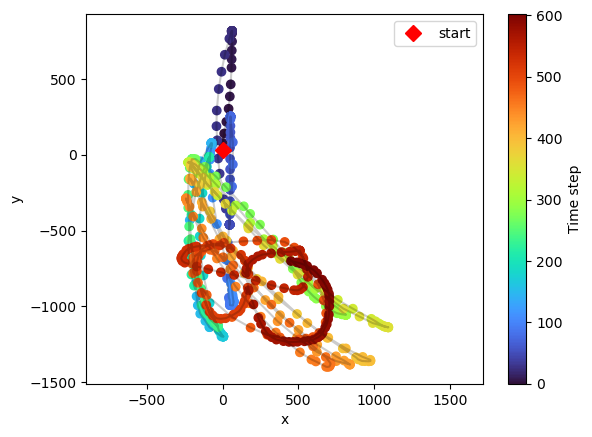

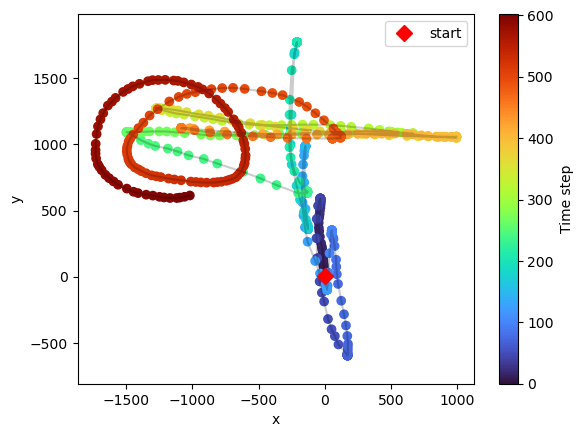

In [6]:
# get the number of trials
num_trials = df['trial'].nunique()
# calculate the number of rows and columns for the subplots
num_rows = num_trials // 2
num_cols = 2
if num_trials % 2 > 0:
    num_rows += 1

# create a subplot for each trial
fig, axs = plt.subplots(num_rows, num_cols, figsize=(6, 4))  # adjust figsize as needed

# for each trial, plot the trajectory
for i, (name, group) in enumerate(df.groupby('trial')):
    row = i // num_cols
    col = i % num_cols
    x = group[['x']].values
    y = group[['y']].values
    traj_withColour(x, y, ax=axs[row, col])

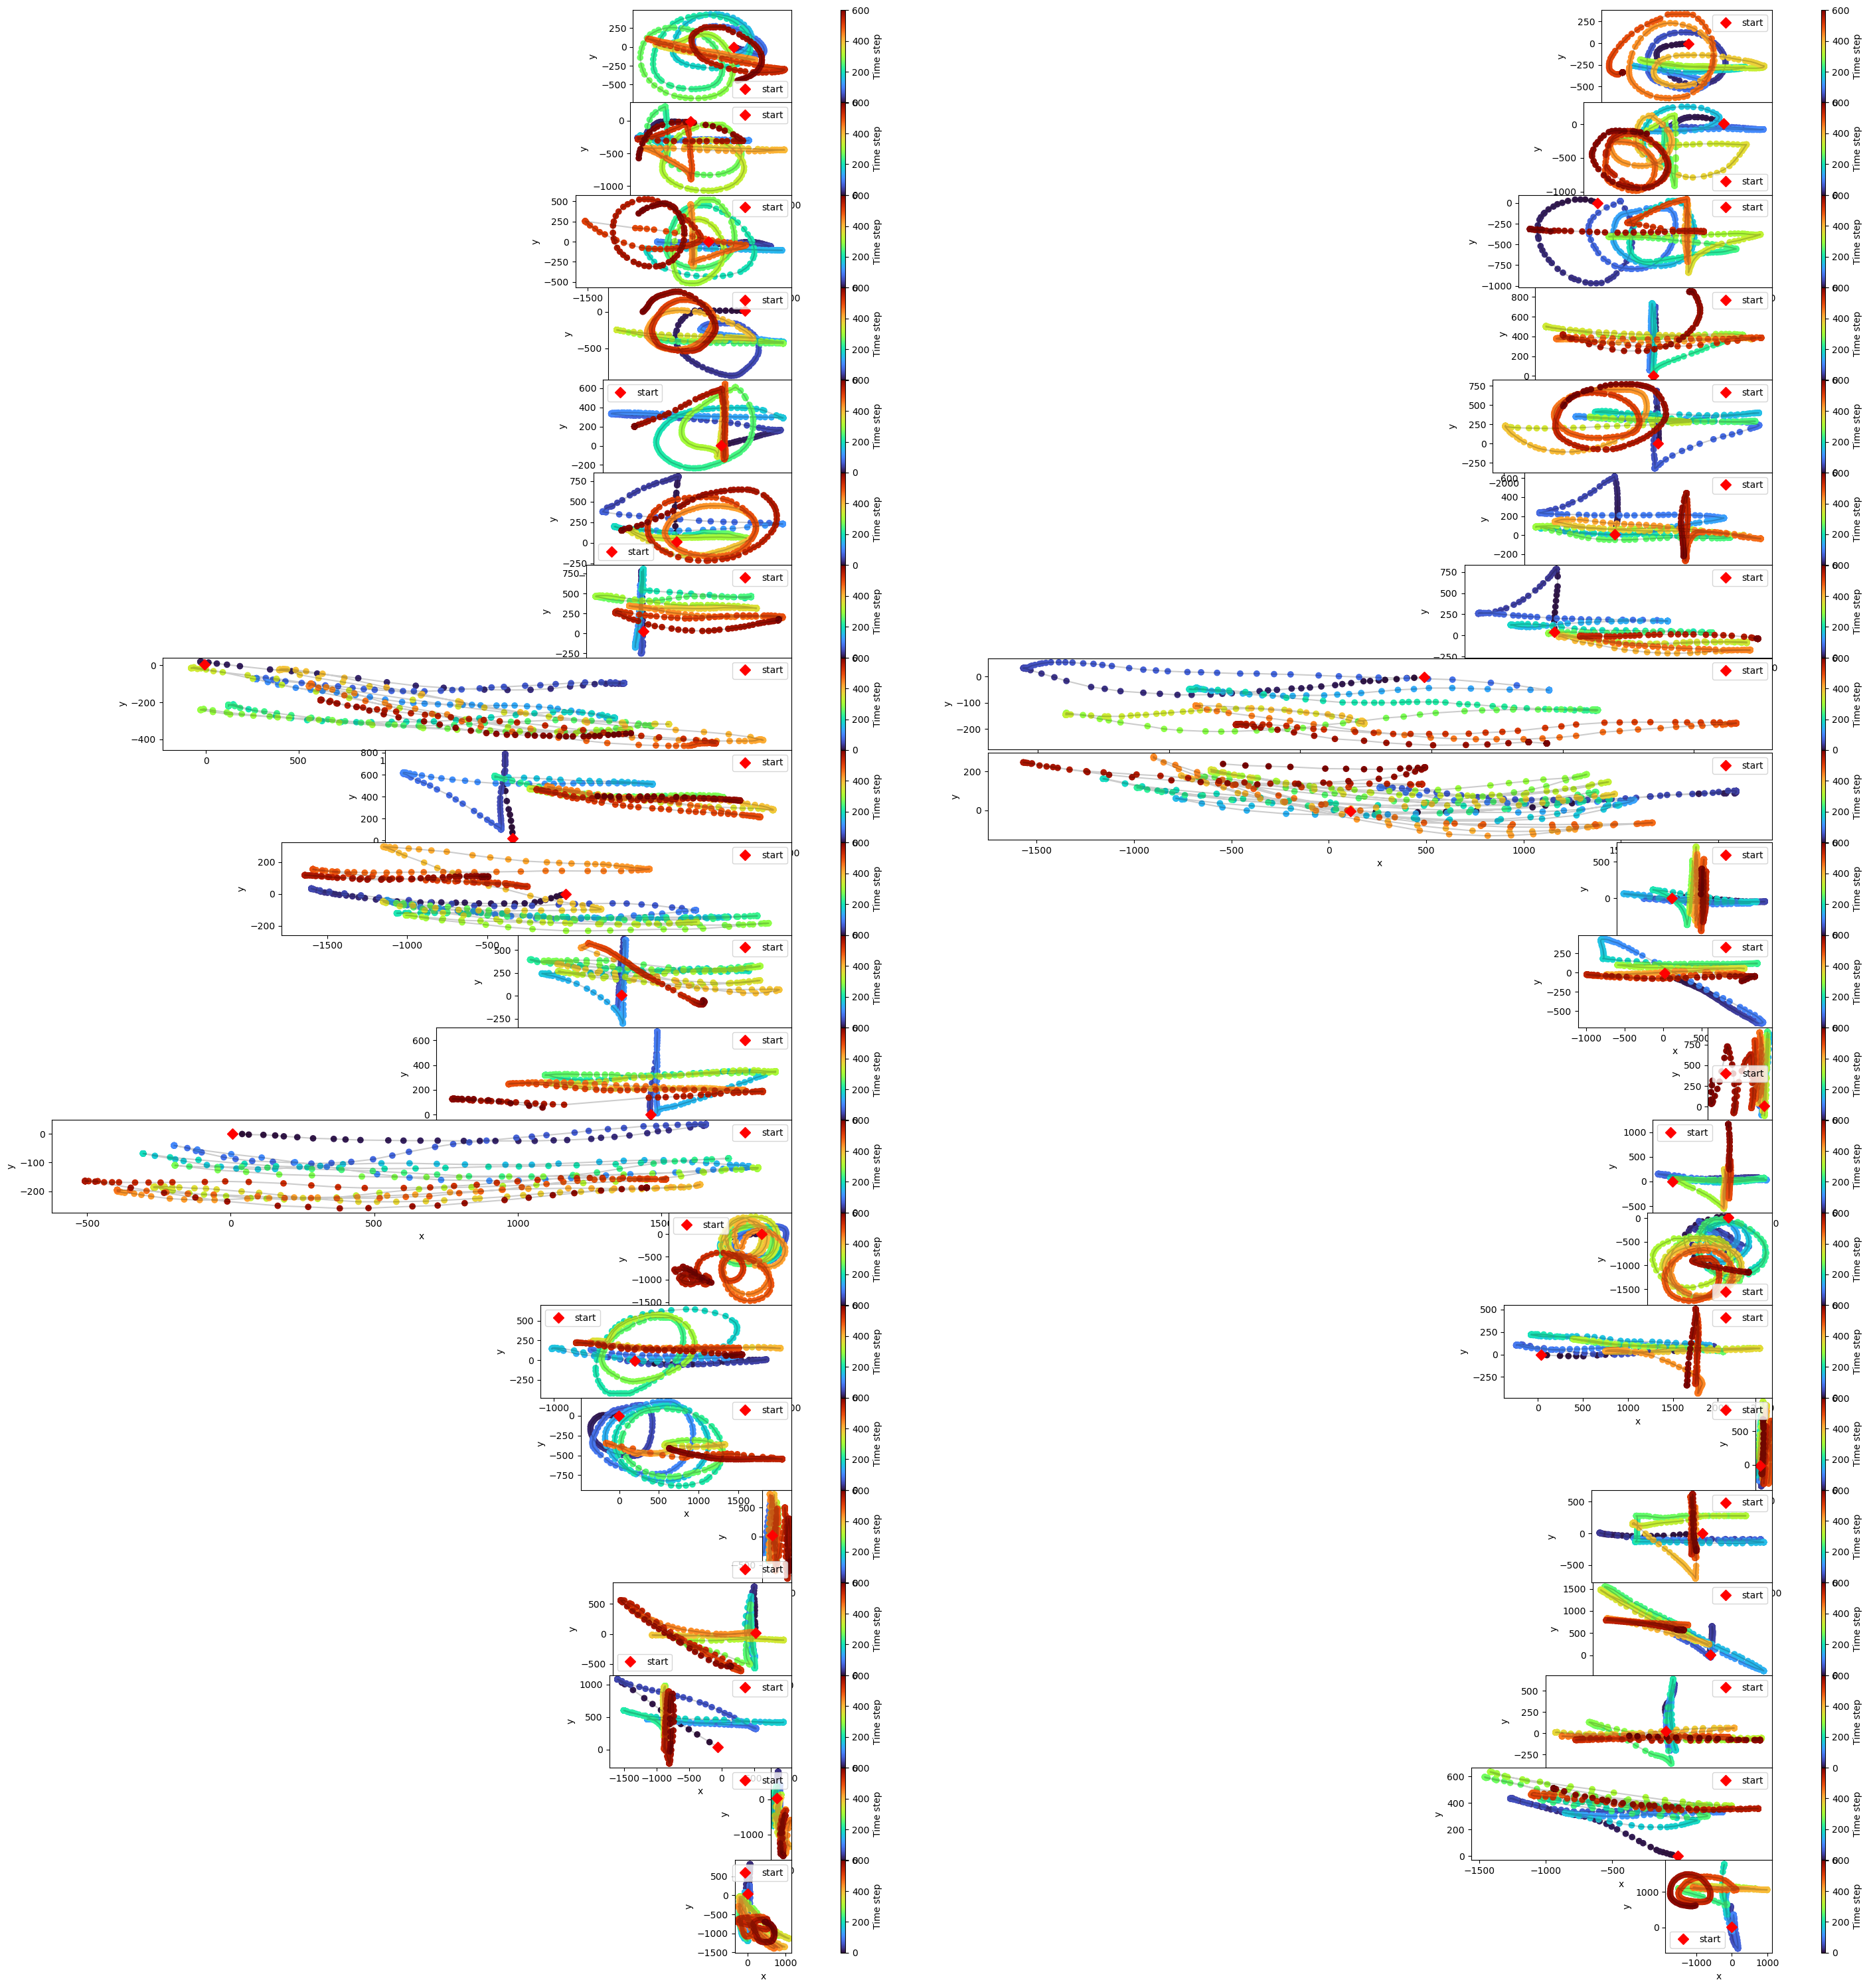

In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def traj_withColour(x, y, fig=None, ax=None):
    if fig is None or ax is None:
        fig, ax = plt.subplots()
    colors = np.linspace(0, 1, len(x))
    ax.plot(x, y, '-k', alpha=0.2)
    ax.scatter(x, y, c=colors, cmap='turbo')
    ax.plot(x[0], y[0], 'Dr', label='start', markersize=8)
    norm = mpl.colors.Normalize(vmin=0, vmax=len(x))
    cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap='turbo', norm=norm), ax=ax)
    cbar.set_label('Time step')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')
    ax.legend()
    return fig, ax

# Get the number of trials
num_trials = df['trial'].nunique()

# Calculate the number of rows and columns for the subplots
num_rows = num_trials // 2
num_cols = 2
if num_trials % 2 > 0:
    num_rows += 1

# Create a subplot for each trial
fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 30), gridspec_kw={'hspace': 0, 'wspace': 0})

# For each trial, plot the trajectory
for i, (name, group) in enumerate(df.groupby('trial')):
    row = i // num_cols
    col = i % num_cols
    x = group['x'].values  # Corrected column selection
    y = group['y'].values  # Corrected column selection
    traj_withColour(x, y, fig=fig, ax=axs[row, col])

# Show the plot
plt.tight_layout()
plt.show()


KeyError: 'x'

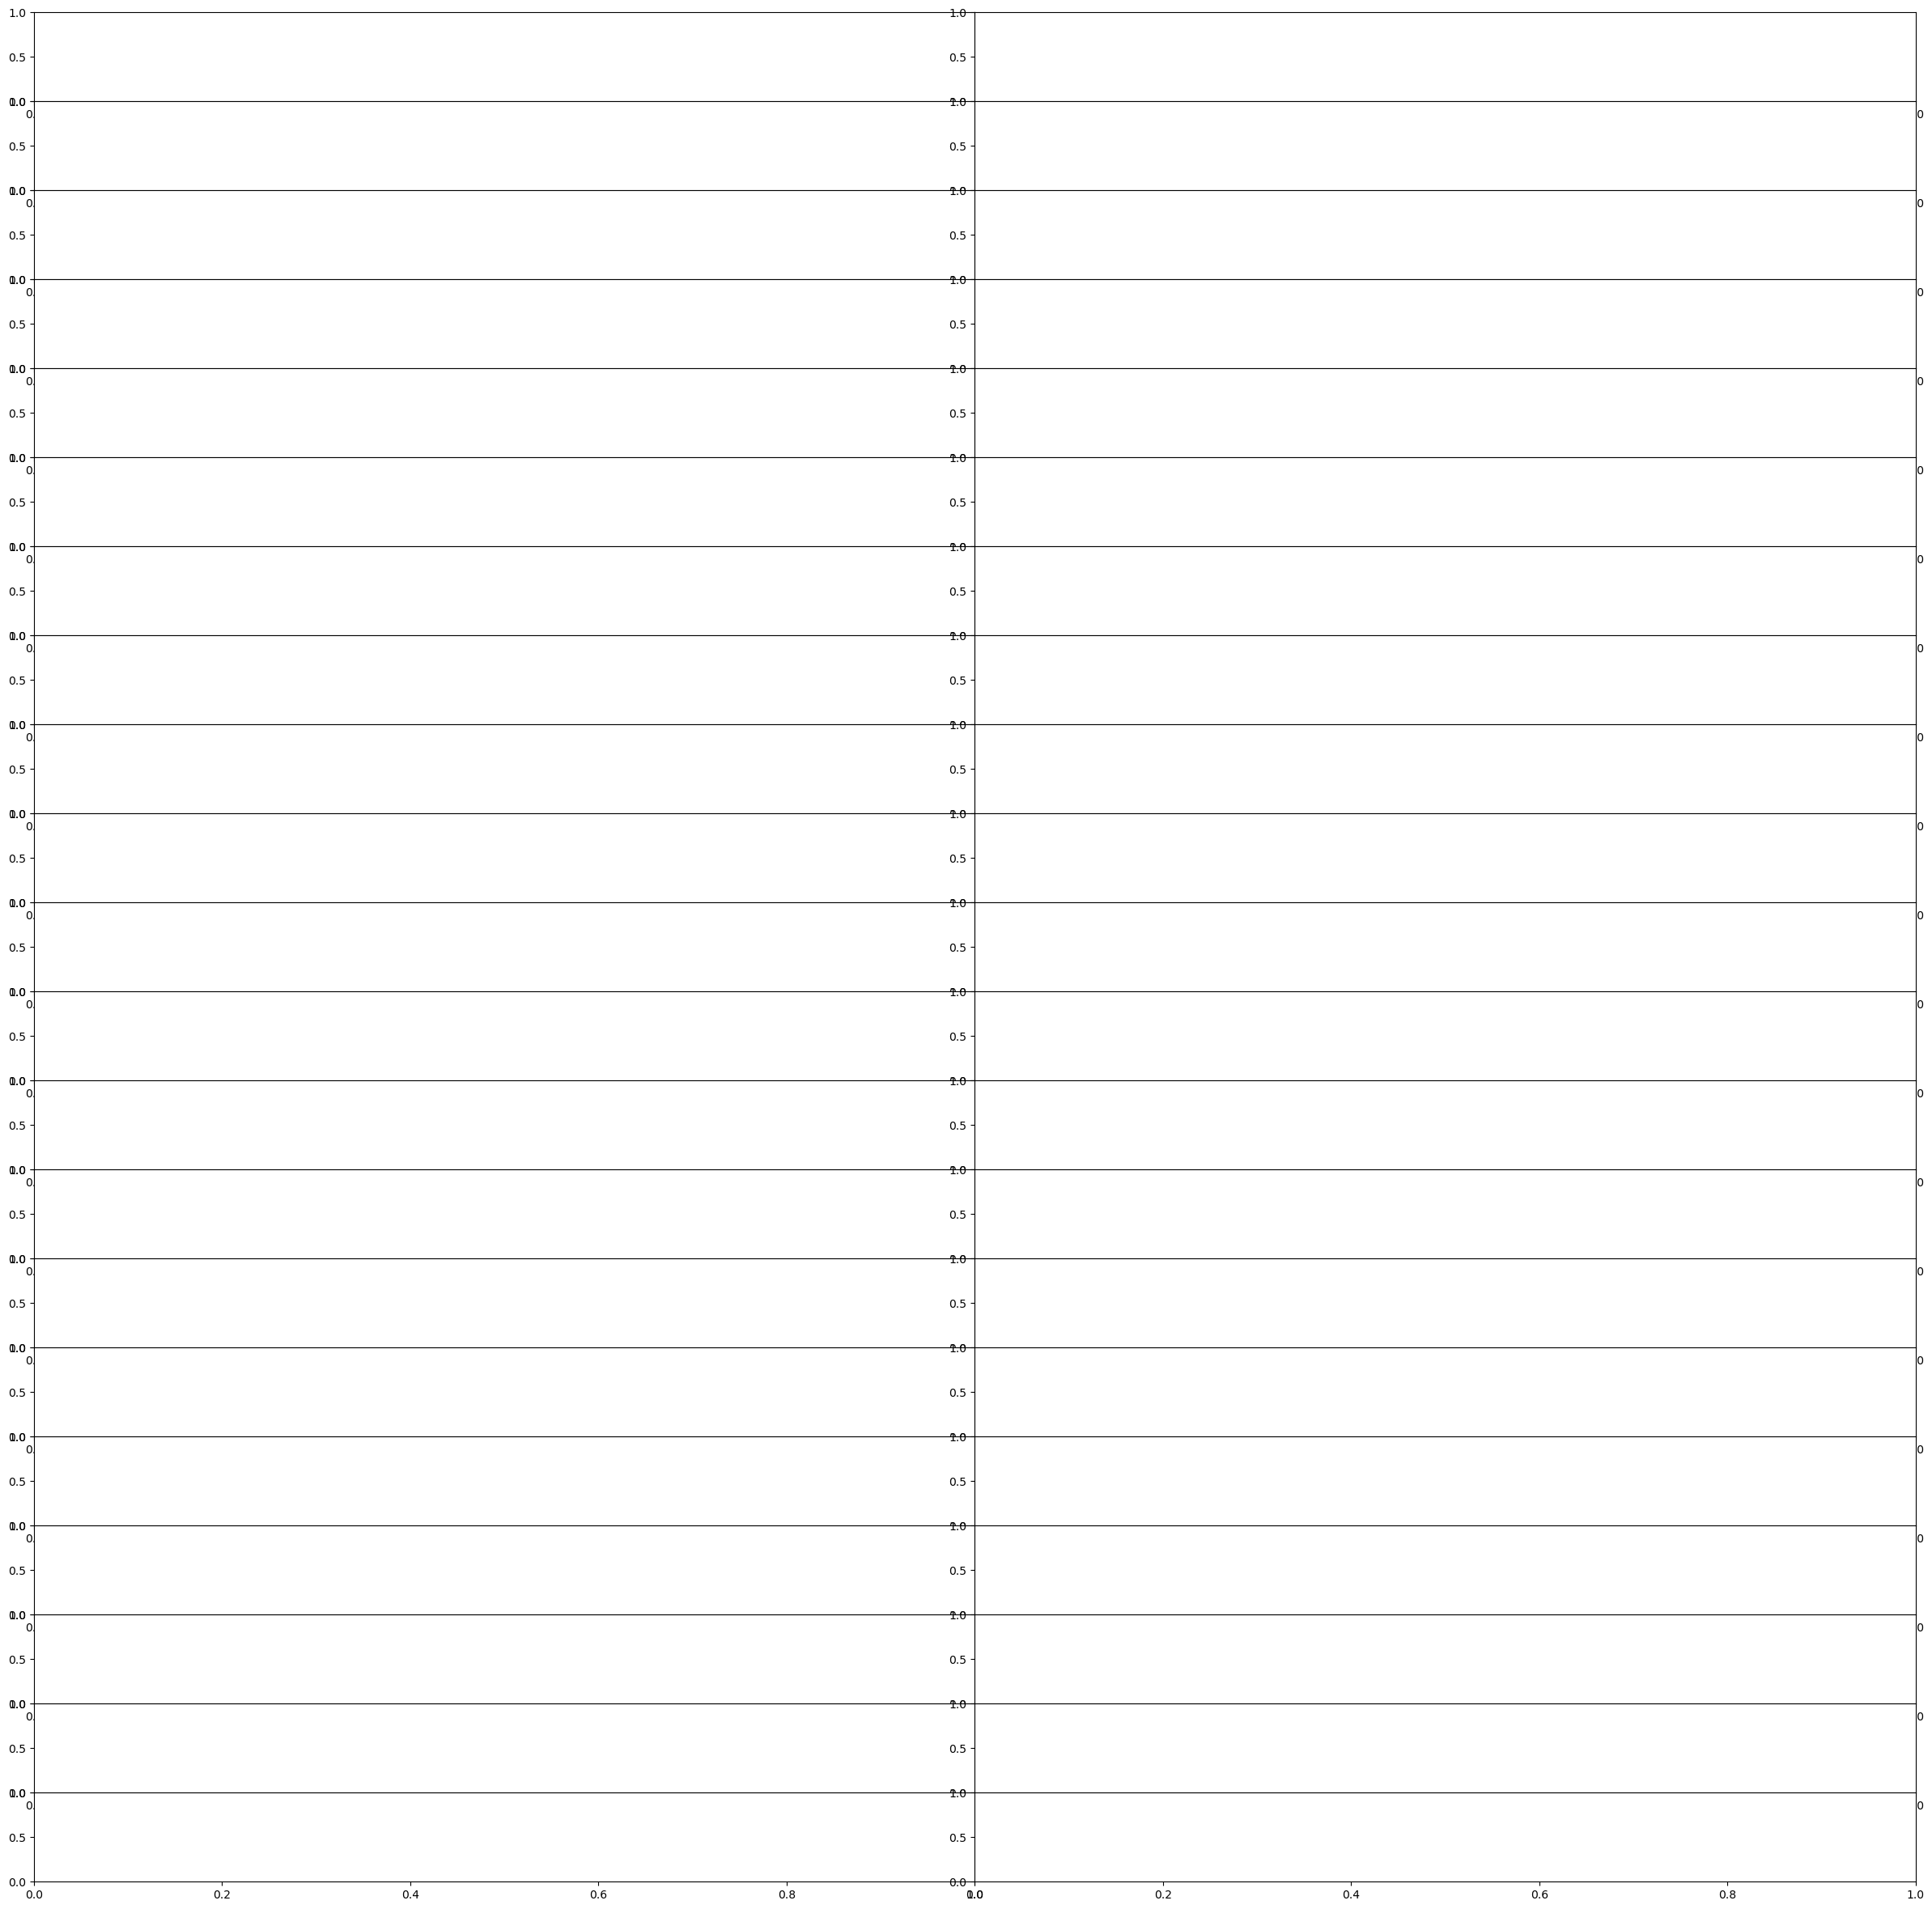

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# データを読み込む
df = pd.read_csv('sample data 2/1_19-Oct-2019_10-18-23_results.csv')
data = sio.loadmat('/Users/tstakuma/Desktop/Rikkyo_Action_Analysis/PRJ/sample data 2/1_19-Oct-2019_10-18-23_mouse.mat')

mouseMovement = data['mouseMovement']
# extract the x and y coordinates
x = data['mouseMovement'][0]
y = data['mouseMovement'][1]


def traj_withColour(x, y, actual_control, fig=None, ax=None):
    if fig is None or ax is None:
        fig, ax = plt.subplots()
    colors = np.linspace(0, 1, len(x))
    ax.plot(x, y, '-k', alpha=0.2)
    ax.scatter(x, y, c=colors, cmap='turbo')
    ax.plot(x[0], y[0], 'Dr', label='start', markersize=8)
    norm = mpl.colors.Normalize(vmin=0, vmax=len(x))
    cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap='turbo', norm=norm), ax=ax)
    cbar.set_label('Time step')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')
    ax.legend()
    return fig, ax

# Get the number of trials
num_trials = df['trial no.'].nunique()

# Calculate the number of rows and columns for the subplots
num_rows = num_trials // 2
num_cols = 2
if num_trials % 2 > 0:
    num_rows += 1

# Create a subplot for each trial
fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 30), gridspec_kw={'hspace': 0, 'wspace': 0})

for i, (name, group) in enumerate(df.groupby('trial no.')):
    row = i // num_cols
    col = i % num_cols
    x = group['x'].values  # Corrected column selection
    y = group['y'].values  # Corrected column selection
    traj_withColour(x, y, fig=fig, ax=axs[row, col])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# データを読み込む
df = pd.read_csv('sample data 2/1_19-Oct-2019_10-18-23_results.csv')

def traj_withColour(x, y, actual_control, fig=None, ax=None):
    if fig is None or ax is None:
        fig, ax = plt.subplots()
    colors = np.linspace(0, 1, len(x))
    ax.plot(x, y, '-k', alpha=0.2)
    ax.scatter(x, y, c=colors, cmap='turbo')
    ax.plot(x[0], y[0], 'Dr', label='start', markersize=8)
    ax.axis('equal')
    norm = mpl.colors.Normalize(vmin=0, vmax=len(x))
    cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap='turbo', norm=norm), ax=ax)
    cbar.set_label('Time step')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Actual Control Level {actual_control}')  # Add title with actual control level
    ax.legend()
    return fig, ax

# Get the number of trials
num_trials = df['trial no.'].nunique()

# Calculate the number of rows and columns for the subplots
num_rows = num_trials // 2
num_cols = 2
if num_trials % 2 > 0:
    num_rows += 1

# Create a subplot for each trial
fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 30))

# For each trial, plot the trajectory
for i, (name, group) in enumerate(df.groupby('trial no.')):
    row = i // num_cols
    col = i % num_cols
    x = group['actual control'].values  # 'actual control' 列を x 座標として取得
    y = group['actual control'].values  # 'actual control' 列を y 座標として取得
    actual_control = group['actual control'].values[0]  # Get the actual control level for this trial
    traj_withColour(x, y, actual_control, fig=fig, ax=axs[row, col])
    axs[row, col].set_aspect('equal')
    axs[row, col].set_title(f'Trial: Actual Control Level {actual_control}')  # Set title with actual control level

# Remove any extra empty subplots
for i in range(num_trials, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

In [ ]:
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt

# .matファイルからデータを読み込む
mat_data = loadmat('/Users/tstakuma/Desktop/rikkyo_action_analysis/PRJ/sample data 2/1_19-Oct-2019_10-18-23_mouse.mat')
# マウスの動きのデータを取得
mouse_movement = mat_data['mouseMovement']
# convert mouseMovement from a 2D array to pandas dataframe
mouse_df = pd.DataFrame(mouseMovement, columns=['trial', 'sample', 'dx', 'dy'])

# x 座標と y 座標を計算する
mouse_df['x'] = mouse_df.groupby('trial')['dx'].cumsum()
mouse_df['y'] = mouse_df.groupby('trial')['dy'].cumsum()
mouse_df = mouse_df.reset_index(drop=True)

# "actual control" のデータを読み込む
control_df = pd.read_csv('/Users/tstakuma/Desktop/rikkyo_action_analysis/PRJ/sample data 2/1_19-Oct-2019_10-18-23_results.csv')

# マウスの動きと "actual control" データを組み合わせたプロットを行う関数
def plot_mouse_movement_with_control(mouse_df, control_df):
    # Get the number of trials
    num_trials = mouse_df['trial'].nunique()

    # Calculate the number of rows and columns for the subplots
    num_rows = num_trials // 2
    num_cols = 2
    if num_trials % 2 > 0:
        num_rows += 1
       
# 各サブプロットにタイトルを追加し、"actual control"のレベルを表示します
for i, (name, group) in enumerate(df.groupby('trial no.')):
    row = i // num_cols
    col = i % num_cols
    x = group['response'].values  # Assuming 'response' corresponds to 'x'
    y = group['accuracy'].values  # Assuming 'accuracy' corresponds to 'y'
    actual_control = group['actual control'].values[0]  # Get the actual control level for this trial
    fig, ax = traj_withColour(x, y, actual_control, fig=fig, ax=axs[row, col])
    ax.set_title(f'Trial {name}: Actual Control Level {actual_control}')  # Add title with actual control level

    # Remove any extra empty subplots
    for i in range(num_trials, num_rows * num_cols):
        fig.delaxes(axs.flatten()[i])
# マウスの動きと "actual control" データを組み合わせたプロットを行う
plot_mouse_movement_with_control(mouse_df, control_df)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# .matファイルからマウスの動きのデータを読み込む
mat_data = loadmat('/Users/tstakuma/Desktop/rikkyo_action_analysis/PRJ/sample data 2/1_19-Oct-2019_10-18-23_mouse.mat')
# マウスの動きのデータを取得
mouse_movement = mat_data['mouseMovement']
# convert mouseMovement from a 2D array to pandas dataframe
mouse_df = pd.DataFrame(mouse_movement, columns=['trial', 'sample', 'dx', 'dy'])

# x 座標と y 座標を計算する
mouse_df['x'] = mouse_df.groupby('trial')['dx'].cumsum()
mouse_df['y'] = mouse_df.groupby('trial')['dy'].cumsum()
mouse_df = mouse_df.reset_index(drop=True)

# "actual control" のデータを読み込む
control_df = pd.read_csv('/Users/tstakuma/Desktop/rikkyo_action_analysis/PRJ/sample data 2/1_19-Oct-2019_10-18-23_results.csv')

# マウスの動きと "actual control" データを組み合わせたプロットを行う関数
def plot_mouse_movement_with_control(mouse_df, control_df):
    # Get the number of trials
    num_trials = mouse_df['trial'].nunique()

    # Calculate the number of rows and columns for the subplots
    num_rows = num_trials // 2
    num_cols = 2
    if num_trials % 2 > 0:
        num_rows += 1

     # Adjust subplot dimensions to be square
    fig.subplots_adjust(wspace=0.4, hspace=0.4)
    for ax in axs.flat:
        ax.set_aspect('equal')

    # For each trial, plot the mouse movement and add the control level to the title
    for i, (name, group) in enumerate(mouse_df.groupby('trial')):
        row = i // num_cols
        col = i % num_cols
        x = group['x'].values  # 'x' coordinates
        y = group['y'].values  # 'y' coordinates

        # Plot mouse movement using traj_withColour function
        fig, axs[row, col] = traj_withColour(x, y, fig=fig, ax=axs[row, col])
        axs[row, col].set_aspect('equal')
        # Calculate the minimum and maximum x and y values
        min_x = mouse_df['x'].min()
        max_x = mouse_df['x'].max()
        min_y = mouse_df['y'].min()
        max_y = mouse_df['y'].max()
        # Set the x and y axis limits
        axs[row, col].set_xlim([min_x, max_x])
        axs[row, col].set_ylim([min_y, max_y])
        # Add title for each trial with control level
        control_level = control_df.loc[control_df['actual control'] == name, 'actual control']
        if not  control_level.empty:
            control_level =  control_level.iloc[0]
            axs[row, col].set_title(f'Trial {name}: Actual Control Level {control_level}')
        else:
            axs[row, col].set_title(f'Trial {name}: No matching control level found')
        axs[row, col].set_title(f'Trial {name}: Actual Control Level {control_level}')

    # Remove any extra empty subplots
    for i in range(num_trials, num_rows * num_cols):
        fig.delaxes(axs.flatten()[i])

# traj_withColour関数を使ってプロットを作成する
def traj_withColour(x, y, fig=None, ax=None):
    if fig is None:
        fig, ax = plt.subplots_adjust(left=0.1, rihgt=0.9, bottom=0.1, top=0.9)
    colors = np.linspace(0, 1, len(x))
    ax.plot(x, y, '-k', alpha=0.2)
    ax.scatter(x, y, c=colors, cmap='turbo')
    ax.plot(x[0], y[0], 'Dr', label='start', markersize=8)
    ax.axis('equal')
    norm = mpl.colors.Normalize(vmin=0, vmax=len(x))
    cbar = fig.colorbar(mpl.cm.ScalarMappable(
        cmap='turbo', norm=norm), ax=ax)
    cbar.set_label('Time step')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    return fig, ax  # Corrected return statement

# マウスの動きと "actual control" データを組み合わせたプロットを行う
plot_mouse_movement_with_control(mouse_df, control_df)

In [ ]:
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


# .matファイルからマウスの動きのデータを読み込む
mat_data = loadmat('sample data 2/1_19-Oct-2019_10-18-23_mouse.mat')
# マウスの動きのデータを取得
mouse_movement = mat_data['mouseMovement']
# convert mouseMovement from a 2D array to pandas dataframe
mouse_df = pd.DataFrame(mouse_movement, columns=['trial', 'sample', 'dx', 'dy'])
# x 座標と y 座標を計算する
mouse_df['x'] = mouse_df.groupby('trial')['dx'].cumsum()
mouse_df['y'] = mouse_df.groupby('trial')['dy'].cumsum()
mouse_df = mouse_df.reset_index(drop=True)

# CSVファイルからデータを読み込む
control_df = pd.read_csv('sample data 2/1_19-Oct-2019_10-18-23_results.csv')
# "actual control"を抽出する
actual_control = control_df['actual control']

# Create subplots
fig, axs = plt.subplots(len(mouse_df), figsize=(10, 10))

def plot_mouse_movement_with_control(mouse_df, control_df):
    # Get the number of trials
    num_trials = mouse_df['trial'].nunique()

    # Calculate the number of rows and columns for the subplots
    num_rows = int(np.ceil(np.sqrt(num_trials)))  # Use square root to get a square layout
    num_cols = num_rows

    # Adjust subplot dimensions to be square
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    fig.subplots_adjust(wspace=0.4, hspace=0.4)
    for ax in axs.flat:
        ax.set_aspect('equal')
        ax.set_box_aspect(1)


for i, (name, group) in enumerate(mouse_df.groupby('trial')):
        row = i // num_cols
        col = i % num_cols
        x = group['x'].values  # 'x' coordinates
        y = group['y'].values  # 'y' coordinates

        # Plot mouse movement using traj_withColour function
        colors = np.linspace(0, 1, len(x))
        axs[row, col].plot(x, y, '-k', alpha=0.2)
        axs[row, col].scatter(x, y, c=colors, cmap='turbo')
        axs[row, col].plot(x[0], y[0], 'Dr', label='start', markersize=8)
        axs[row, col].axis('equal')
        norm = mpl.colors.Normalize(vmin=0, vmax=len(x)-1)  # Corrected vmin and vmax values
        cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap='turbo', norm=norm), ax=axs[row, col])
        cbar.set_label('Time step')
        axs[row, col].set_xlabel('x')
        axs[row, col].set_ylabel('y')
        axs[row, col].legend()

        # Set the x and y axis limits for this trial
        axs[row, col].set_xlim([group['x'].min(), group['x'].max()])
        axs[row, col].set_ylim([group['y'].min(), group['y'].max()])

        # Add title for each trial with control level
        control_level = control_df.loc[control_df['actual control'] == name, 'actual control']
        if not control_level.empty:
            control_level = control_level.iloc[0]
            axs[row, col].set_title(f'Trial {name}: Actual Control Level {control_level}')
        else:
            axs[row, col].set_title(f'Trial {name}: No matching control level found')
        
    # Remove any extra empty subplots
for i in range(num_trials, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

# マウスの動きと "actual control" データを組み合わせたプロットを行う
plot_mouse_movement_with_control(mouse_df, control_df)

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

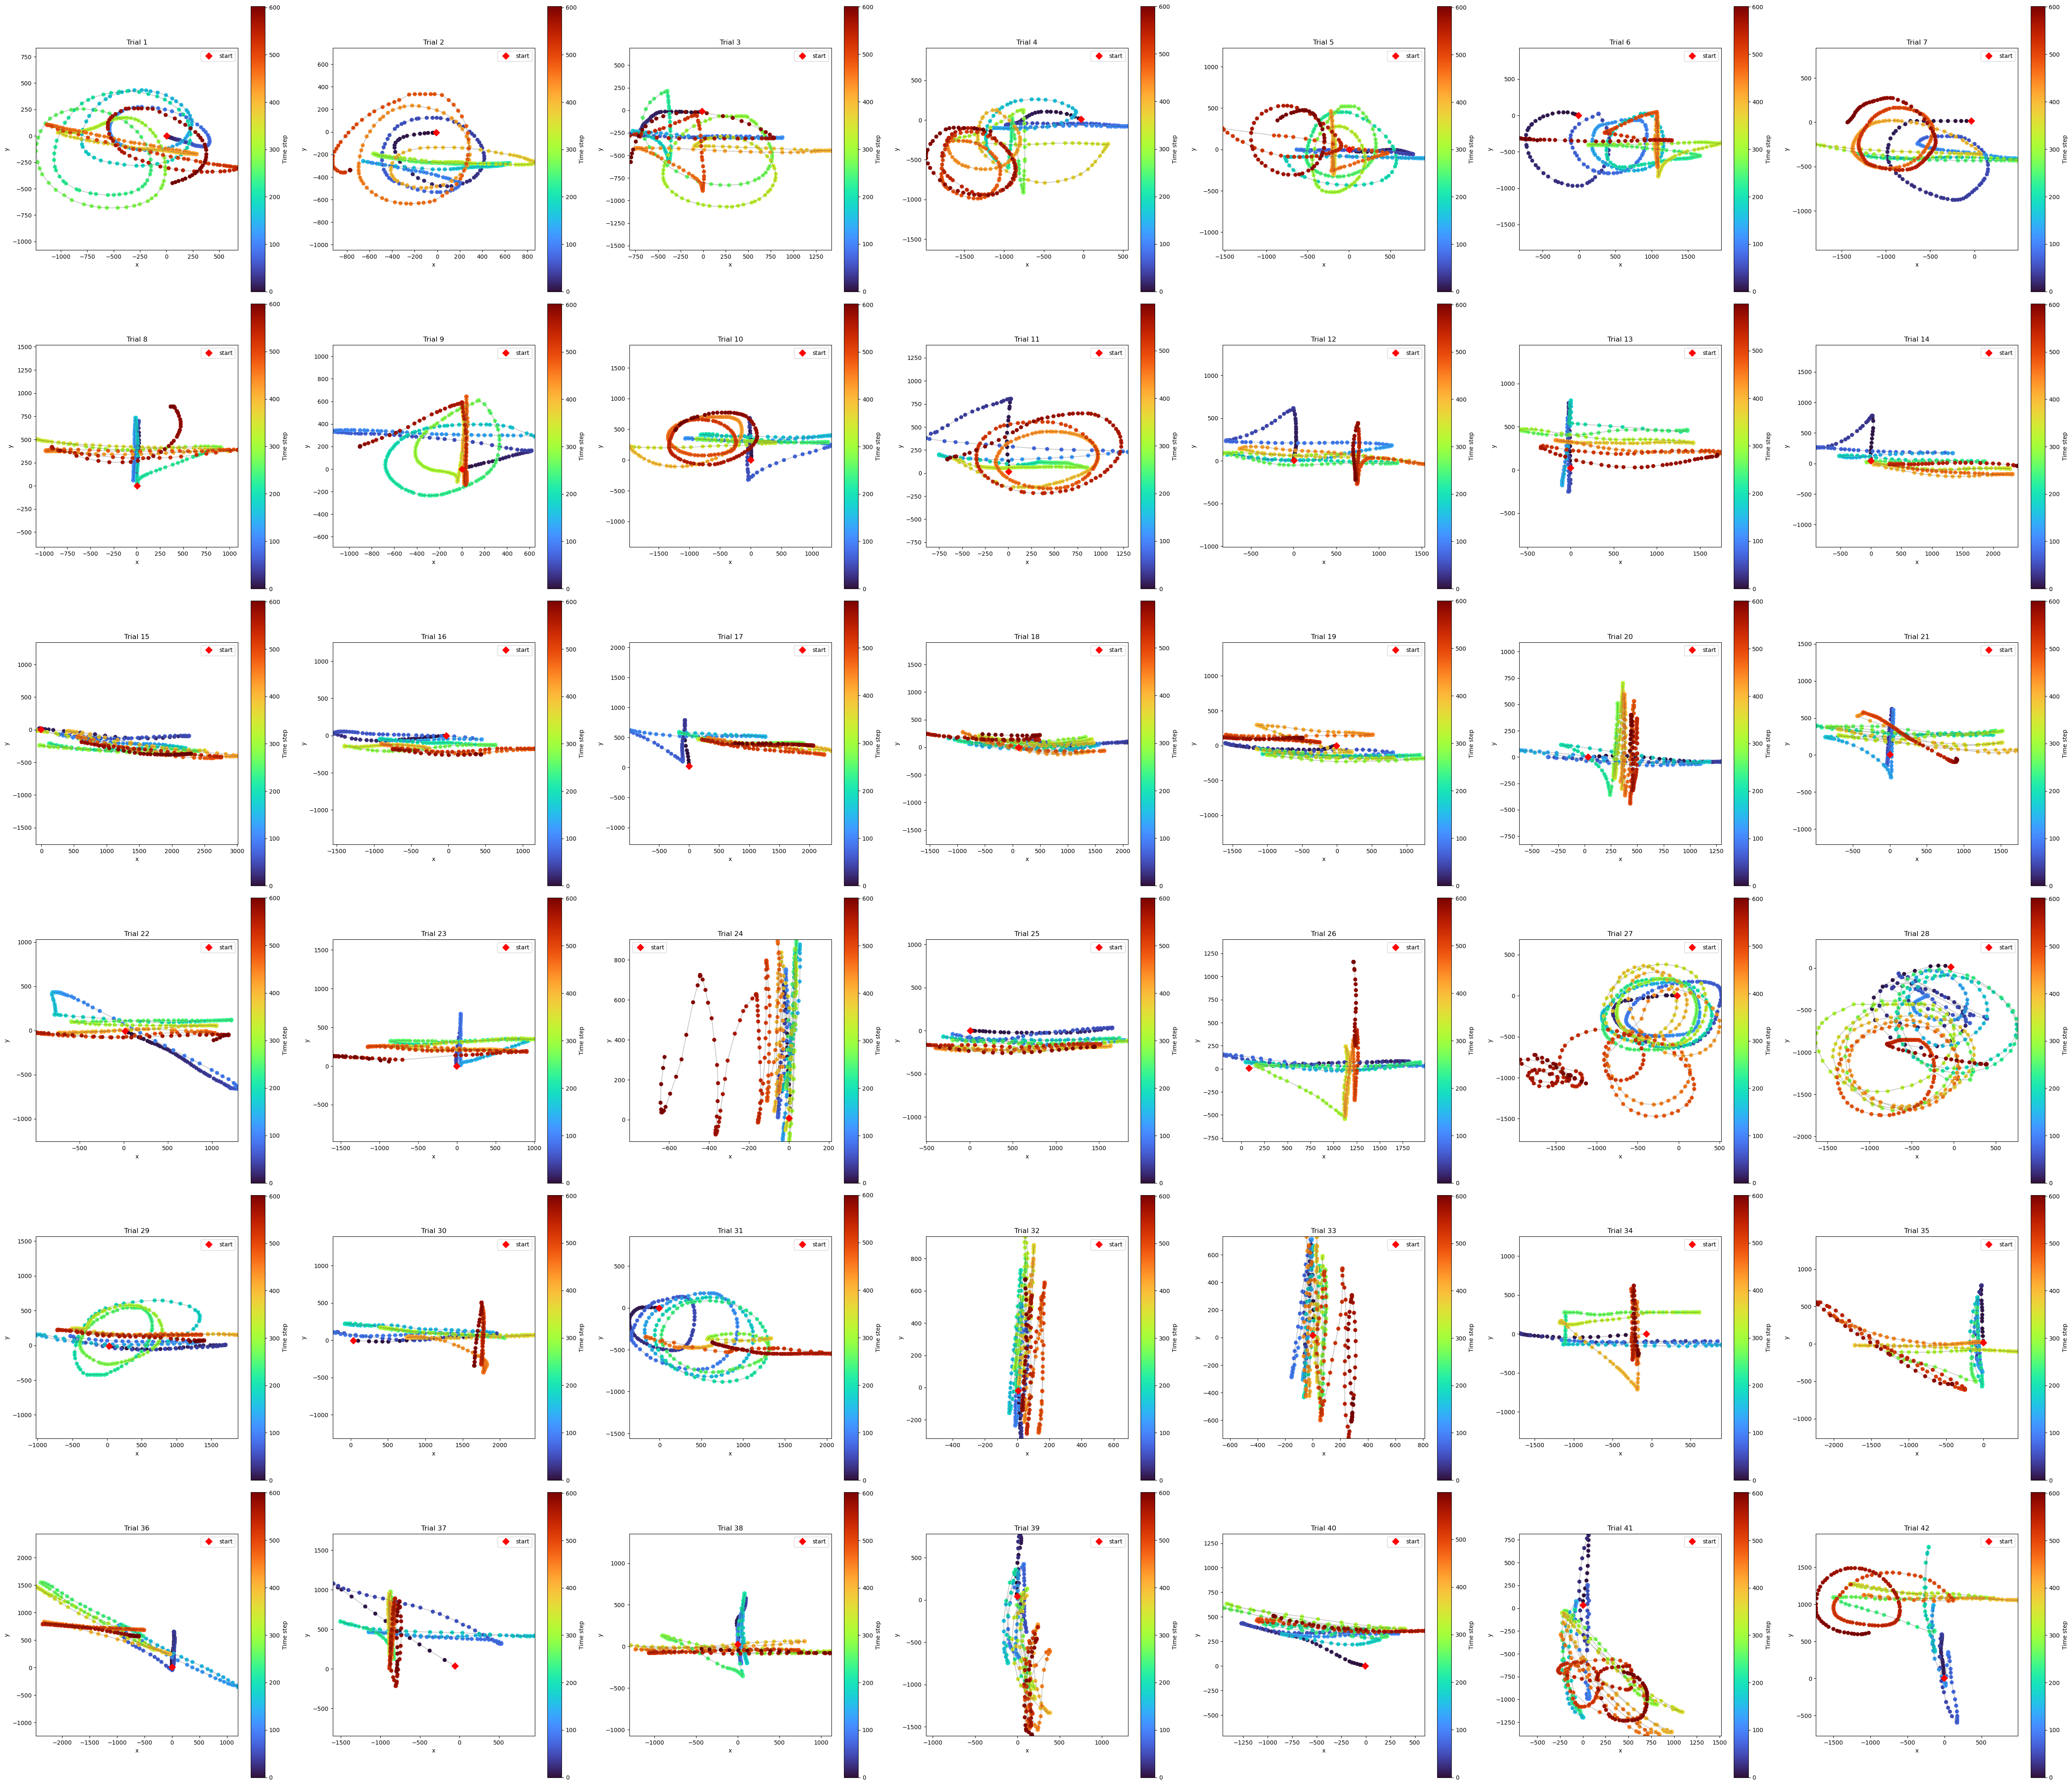

In [16]:
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# .matファイルからマウスの動きのデータを読み込む
mat_data = loadmat('sample data 2/1_19-Oct-2019_10-18-23_mouse.mat')
# マウスの動きのデータを取得
mouse_movement = mat_data['mouseMovement']
# convert mouseMovement from a 2D array to pandas dataframe
mouse_df = pd.DataFrame(mouse_movement, columns=['trial', 'sample', 'dx', 'dy'])
# x 座標と y 座標を計算する
mouse_df['x'] = mouse_df.groupby('trial')['dx'].cumsum()
mouse_df['y'] = mouse_df.groupby('trial')['dy'].cumsum()
mouse_df = mouse_df.reset_index(drop=True)

# CSVファイルからデータを読み込む
control_df = pd.read_csv('sample data 2/1_19-Oct-2019_10-18-23_results.csv')
# "actual control"を抽出する
actual_control = control_df['actual control']

# traj_withColour関数を使ってプロットを作成する
def traj_withColour(x, y, ax):
    colors = np.linspace(0, 1, len(x))
    ax.plot(x, y, '-k', alpha=0.2)
    ax.scatter(x, y, c=colors, cmap='turbo')
    ax.plot(x[0], y[0], 'Dr', label='start', markersize=8)
    ax.axis('equal')
    norm = mpl.colors.Normalize(vmin=0, vmax=len(x))  # Corrected vmin and vmax values
    cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap='turbo', norm=norm), ax=ax)
    cbar.set_label('Time step')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()

# Create subplots
num_trials = mouse_df['trial'].nunique()
num_rows = int(np.ceil(np.sqrt(num_trials)))
num_cols = num_rows

# Adjust subplot dimensions to be square
fig, axs = plt.subplots(num_rows, num_cols, figsize=(50, 50))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
for ax in axs.flat:
    ax.set_aspect('equal')
    ax.set_box_aspect(1)

# For each trial, plot the mouse movement and add the control level to the title
for i, (name, group) in enumerate(mouse_df.groupby('trial')):
    row = i // num_cols
    col = i % num_cols
    x = group['x'].values  # 'x' coordinates
    y = group['y'].values  # 'y' coordinates

    traj_withColour(x, y, ax=axs[row, col])  # Plot using traj_withColour function

    axs[row, col].set_xlim([group['x'].min(), group['x'].max()])
    axs[row, col].set_ylim([group['y'].min(), group['y'].max()])

    control_level = control_df.loc[control_df['actual control'] == name, 'actual control']
    if not control_level.empty:
        control_level = control_level.iloc[0]
        axs[row, col].set_title(f'Trial {name}')
    else:
        axs[row, col].set_title(f'Trial {name}')

for i in range(num_trials, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()